In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

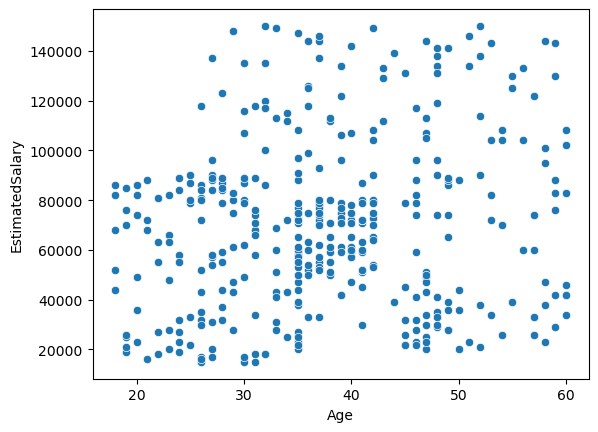

In [11]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])


In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ritik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4394 - loss: 815.0243 - val_accuracy: 0.4000 - val_loss: 175.1228
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4423 - loss: 120.8219 - val_accuracy: 0.6000 - val_loss: 83.1167
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6066 - loss: 107.3002 - val_accuracy: 0.6000 - val_loss: 95.9710
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5652 - loss: 67.3368 - val_accuracy: 0.4000 - val_loss: 92.0770
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4140 - loss: 103.7722 - val_accuracy: 0.4000 - val_loss: 98.8681
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5046 - loss: 60.6461 - val_accuracy: 0.6000 - val_loss: 30.1543
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4900 - loss: 53.3561 - val_accuracy: 0.6000 - val_loss: 6.9028
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4873 - loss: 34.4005

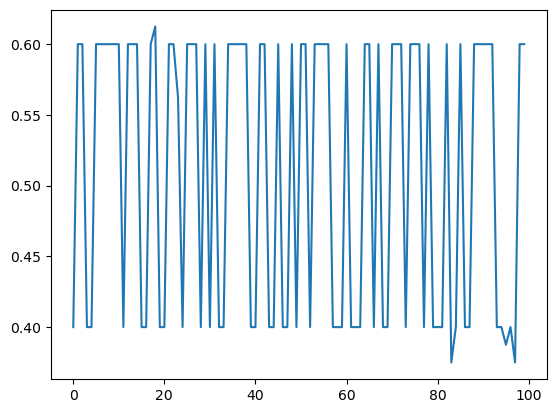

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [21]:
# Applying scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

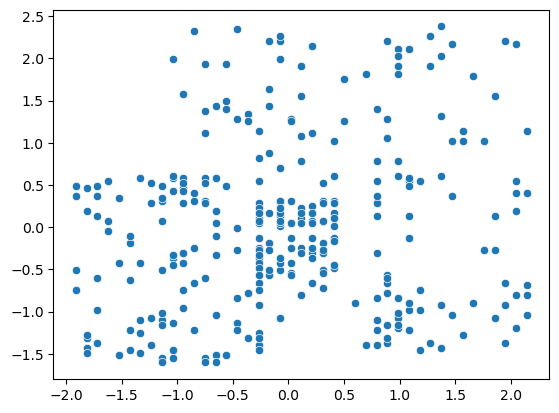

In [25]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [26]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


C:\Users\ritik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4286 - loss: 0.7047 - val_accuracy: 0.7625 - val_loss: 0.6497
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7393 - loss: 0.6471 - val_accuracy: 0.8375 - val_loss: 0.5958
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8557 - loss: 0.5910 - val_accuracy: 0.8750 - val_loss: 0.5488
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8267 - loss: 0.5629 - val_accuracy: 0.8750 - val_loss: 0.5096
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8527 - loss: 0.5106 - val_accuracy: 0.8500 - val_loss: 0.4749
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8289 - loss: 0.4991 - val_accuracy: 0.8500 - val_loss: 0.4463
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8846 - loss: 0.4557 - val_accuracy: 0.8375 - val_loss: 0.4201
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8831 - loss: 0.4221 - val_accuracy: 0.8375 - val_l

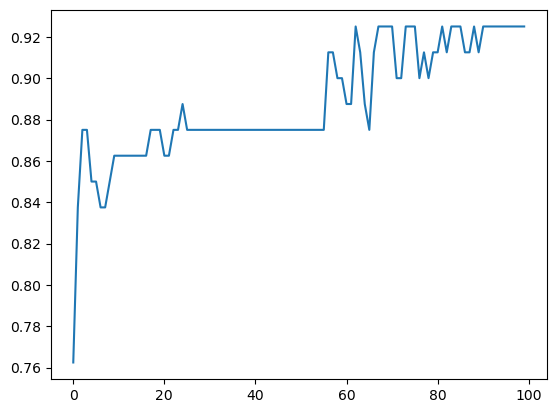

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])